In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("customer churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
#taking the dependent variables
x=df.iloc[:, 0:20]
x.values
#x.head()-->print few rows for checking 

array([['7590-VHVEG', 'Female', 0, ..., 'Electronic check', 29.85,
        '29.85'],
       ['5575-GNVDE', 'Male', 0, ..., 'Mailed check', 56.95, '1889.5'],
       ['3668-QPYBK', 'Male', 0, ..., 'Mailed check', 53.85, '108.15'],
       ...,
       ['4801-JZAZL', 'Female', 0, ..., 'Electronic check', 29.6,
        '346.45'],
       ['8361-LTMKD', 'Male', 1, ..., 'Mailed check', 74.4, '306.6'],
       ['3186-AJIEK', 'Male', 0, ..., 'Bank transfer (automatic)',
        105.65, '6844.5']], dtype=object)

In [4]:
#taking the independent varaibles
y=df[['Churn']]
y.values

array([['No'],
       ['No'],
       ['Yes'],
       ...,
       ['No'],
       ['Yes'],
       ['No']], dtype=object)

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
feature_array=ohe.fit_transform(df[['PaymentMethod', 'Contract', 'InternetService']]).toarray()
# Extract the feature labels
feature_label = ohe.get_feature_names_out(['PaymentMethod', 'Contract', 'InternetService'])

# Create a DataFrame using feature_array and feature_label
df_encoded = pd.DataFrame(feature_array, columns=feature_label)
df_encoded.dtypes

PaymentMethod_Bank transfer (automatic)    float64
PaymentMethod_Credit card (automatic)      float64
PaymentMethod_Electronic check             float64
PaymentMethod_Mailed check                 float64
Contract_Month-to-month                    float64
Contract_One year                          float64
Contract_Two year                          float64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No                         float64
dtype: object

In [8]:
#data preprocessing using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
exclude=['SeniorCitizen', 'tenure']
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
exclude1=['MonthlyCharges', 'TotalCharges']
for col in df.columns:
    if col in exclude1:
        df[col]=df[col].astype('float64')
    elif col not in exclude and df[col].dtype=='object':
        df[col]=label.fit_transform(df[col])
    else:
        df[col]=df[col].astype('int64')
df.dtypes

customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Since, we're having missing values, we are doing imputer

In [10]:
#for missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(df.iloc[:, 19:20])
df.iloc[:, 19:20] = imputer.transform(df.iloc[:, 19:20])
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
#correlating
X=df.corr()
X

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


In [13]:
#splitting train and test dataset
from sklearn.model_selection import train_test_split
x=df.iloc[:, 0:20]
y=y=df[['Churn']]
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3,random_state=4)
x_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6489,6560,1,0,0,0,1,1,0,2,1,1,1,1,1,1,0,1,3,18.85,18.85
1964,1667,1,0,0,0,66,1,0,0,2,2,0,0,0,0,1,1,3,54.80,3465.70
6276,3527,0,0,1,1,15,1,0,2,1,1,1,1,1,1,1,0,1,20.35,335.95
788,547,0,0,1,1,24,1,2,0,2,2,0,0,2,2,1,0,2,78.40,1832.40
4884,1617,0,0,1,1,41,1,0,1,0,0,2,0,2,2,0,1,0,94.90,3848.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6017,3125,1,0,0,0,5,1,0,0,0,0,2,2,0,0,0,0,2,56.15,291.45
709,2338,1,0,1,1,29,1,2,0,0,2,2,0,2,2,0,0,1,80.10,2211.80
2487,4695,1,0,0,0,24,1,0,0,2,2,0,2,0,0,0,0,0,60.45,1440.75
174,4190,0,0,0,0,32,1,0,2,1,1,1,1,1,1,1,0,0,20.55,654.55


In [14]:
y_train

,Churn
6489,1
1964,0
6276,0
788,0
4884,0
...,...
6017,0
709,0
2487,0
174,0


In [15]:
x_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6786,6917,0,0,0,0,11,1,0,0,2,0,0,0,0,0,0,0,1,48.55,501.00
5085,5032,1,0,0,0,39,0,1,0,0,0,0,2,0,2,0,1,2,40.60,1494.50
3371,3491,0,0,1,1,11,1,0,2,1,1,1,1,1,1,0,1,3,19.25,180.30
6012,4031,0,0,1,1,5,1,0,1,0,2,0,0,0,2,0,1,2,83.60,404.20
2748,1711,1,0,0,0,4,0,1,0,0,0,0,0,2,2,0,1,2,44.55,174.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,4931,0,0,0,0,5,1,0,1,0,0,0,0,0,2,0,1,2,80.00,412.50
283,6747,0,0,0,0,68,1,2,0,2,0,0,0,0,0,0,0,3,54.45,3687.75
4144,5110,1,0,0,0,21,1,2,1,2,0,2,0,2,2,0,0,3,103.85,2215.00
526,6071,1,1,1,1,72,1,2,1,2,2,2,2,2,2,2,1,1,115.75,8399.15


In [16]:
y_test.isnull().sum()

Churn    0
dtype: int64

In [17]:
print(df.shape, x_train.shape, x_test.shape)

(7043, 21) (4930, 20) (2113, 20)


# MODEL TRAINING

# 1)LOGISTIC REGRESSION

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [19]:
model = LogisticRegression()
#defining hyperparameter
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [25]:
#best fitting
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

x_train_prediction = best_model.predict(x_train)
training_data_acc = accuracy_score(x_train_prediction, y_train)
print('Accuracy on training data:', training_data_acc)

x_test_prediction = best_model.predict(x_test)
test_data_acc = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:', test_data_acc)

#classification report
print("Classification report:\n")

lr_probs = best_model.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('LR AUROC:', lr_auc)

print(classification_report(y_test, x_test_prediction))



Accuracy on training data: 0.8026369168356998
Accuracy on test data: 0.7808802650260294
Classification report:

LR AUROC: 0.8170988192869191
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1563
           1       0.59      0.54      0.56       550

    accuracy                           0.78      2113
   macro avg       0.71      0.70      0.71      2113
weighted avg       0.78      0.78      0.78      2113



In [21]:
lr_probs = best_model.predict_proba(x_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('AUC:', lr_auc)

AUC: 0.8170988192869191


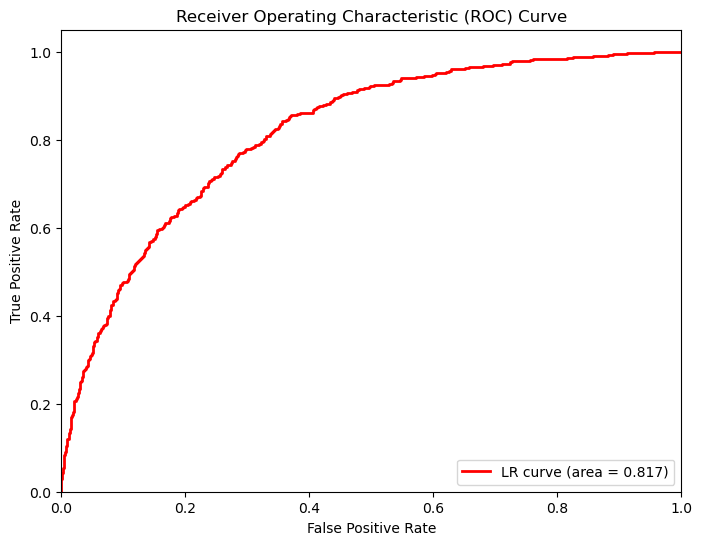

In [22]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, color='red', lw=2, label='LR curve (area = %0.3f)' % lr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 

# 2)RANDOM FOREST

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best RF Training Score: 0.8089244399425614
Best RF Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}
Test Performance: 0.792238523426408
Classification Report:
RF AUROC:  0.8299912755191066
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1563
           1       0.63      0.50      0.56       550

    accuracy                           0.79      2113
   macro avg       0.73      0.70      0.71      2113
weighted avg       0.78      0.79      0.78      2113



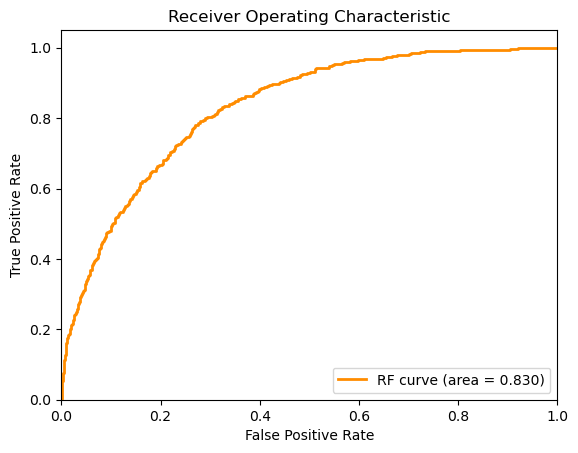

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, accuracy_score


# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(x_train, y_train)

# Get the best estimator
best_rf = random_search.best_estimator_

# Generate predictions
y_train_pred = best_rf.predict(x_train)
y_test_pred = best_rf.predict(x_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best RF Training Score:", random_search.best_score_)
print("Best RF Parameters:", random_search.best_params_)
print("Test Performance:", test_accuracy)

# Print classification report
print("Classification Report:")




# Plot ROC curve
y_test_pred_proba = best_rf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)
print("RF AUROC: ",roc_auc)
print(classification_report(y_test, y_test_pred))

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='RF curve (area = %0.3f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
